In [ ]:
def get_usable_stations_by_dept(
    department_number,
    missing_threshold=0.01,
    year_start=2010,
    year_end=2023
):
    import pandas as pd
    import matplotlib.pyplot as plt

    # Load data
    df = pd.read_csv(f"/data/weather/Q_{department_number}_previous-1950-2023_RR-T-Vent.csv", sep=";", dtype=str)
    df["AAAAMMJJ"] = pd.to_datetime(df["AAAAMMJJ"], format="%Y%m%d", errors="coerce")
    df = df.dropna(subset=["AAAAMMJJ"])
    df = df[(df["AAAAMMJJ"].dt.year >= year_start) & (df["AAAAMMJJ"].dt.year <= year_end)]


    cols_to_check = ["RR", "TN", "TX", "TM"]
    df[cols_to_check] = df[cols_to_check].apply(pd.to_numeric, errors="coerce")

    def evaluate_station(group):
        years = group["AAAAMMJJ"].dt.year
        n_years = years.nunique()
        total_rows = len(group)
        missing_ratios = group[cols_to_check].isna().sum() / total_rows
        return pd.Series({
            "Years Present": sorted(years.unique()),
            "Year Count": n_years,
            "Total Rows": total_rows,
            **{f"Missing_{col}": round(missing_ratios[col], 3) for col in cols_to_check}
        })

    summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()
    usable_stations = summary_df[
        (summary_df["Year Count"] >= 10) &
        (summary_df[[f"Missing_{col}" for col in cols_to_check]] < missing_threshold).all(axis=1)
    ]

    # Save summary
    out_csv = f"usable_stations_summary_dept{department_number}_thr{int(missing_threshold*100)}.csv"
    usable_stations.to_csv(out_csv, index=False)
    print(f"Usable stations in department {department_number} summary saved to '{out_csv}'.")

    # Plot
    year_counts = df[df["NUM_POSTE"].isin(usable_stations["NUM_POSTE"])]
    year_counts = year_counts.groupby(df["AAAAMMJJ"].dt.year)["NUM_POSTE"].nunique()
    plt.figure(figsize=(10, 4))
    year_counts.plot(kind="bar")
    plt.title(f"Usable Stations per Year in Dept {department_number} ({year_start}–{year_end})")
    plt.xlabel("Year")
    plt.ylabel("Station Count")
    plt.tight_layout()
    plt.show()

    return usable_stations


Usable stations in department 02 summary saved to 'usable_stations_summary_dept02_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


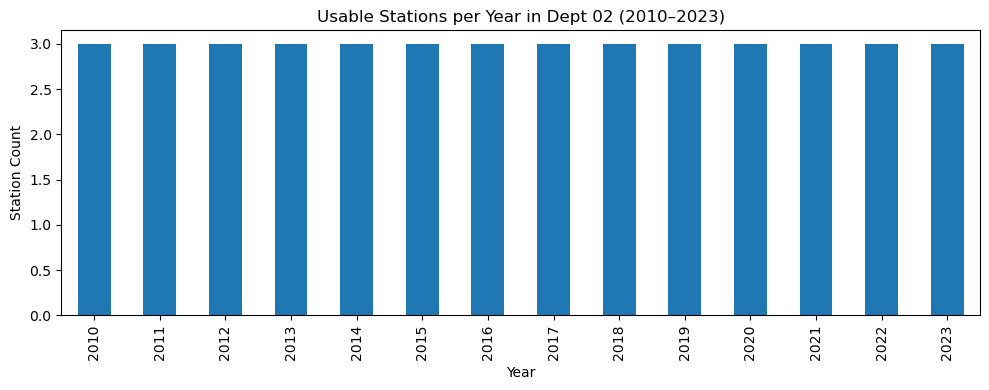

Usable stations in department 07 summary saved to 'usable_stations_summary_dept07_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


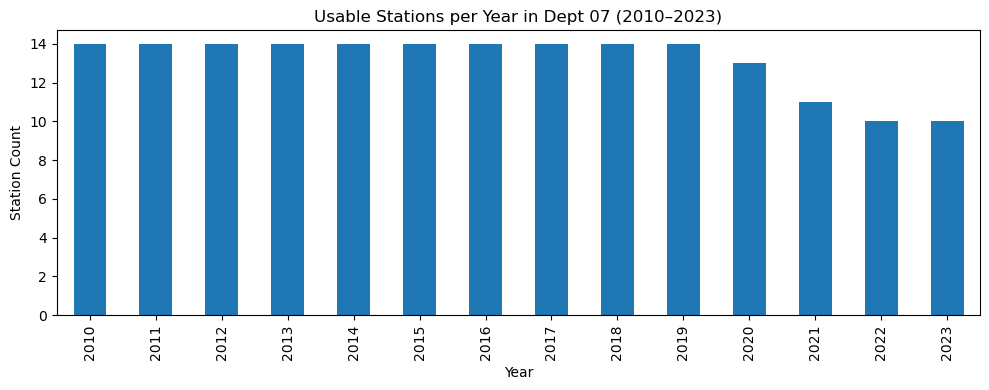

Usable stations in department 10 summary saved to 'usable_stations_summary_dept10_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


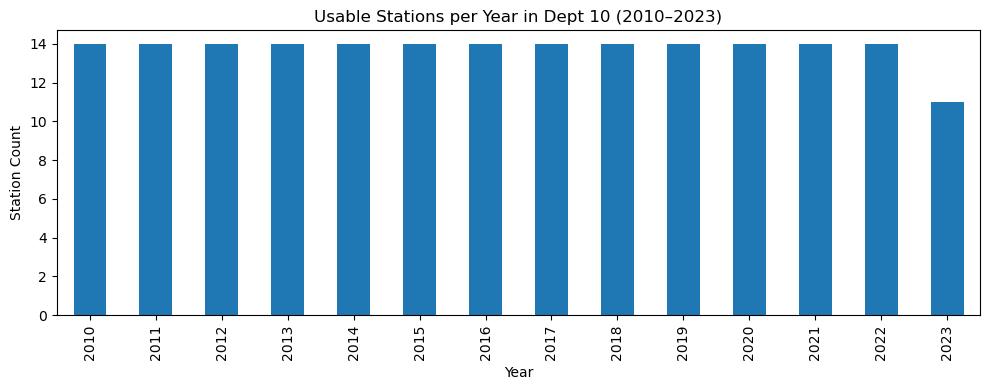

Usable stations in department 11 summary saved to 'usable_stations_summary_dept11_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


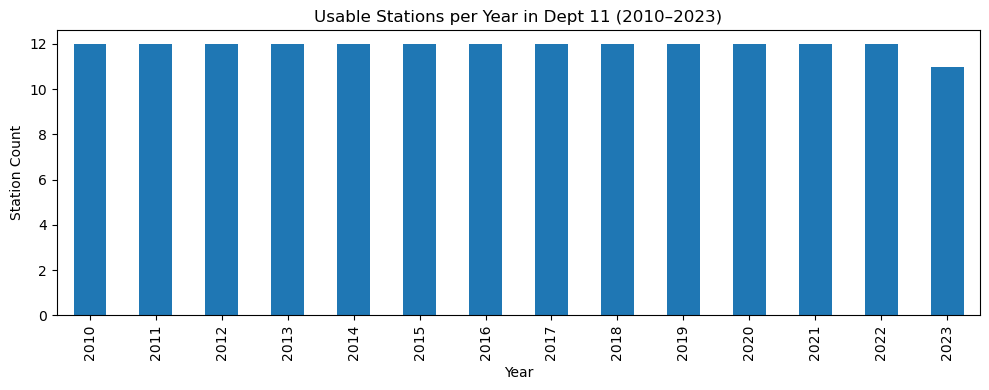

Usable stations in department 13 summary saved to 'usable_stations_summary_dept13_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


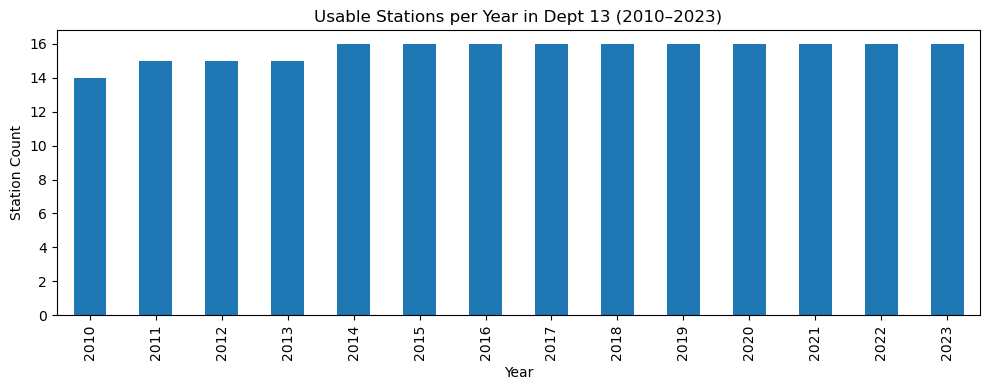

Usable stations in department 18 summary saved to 'usable_stations_summary_dept18_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


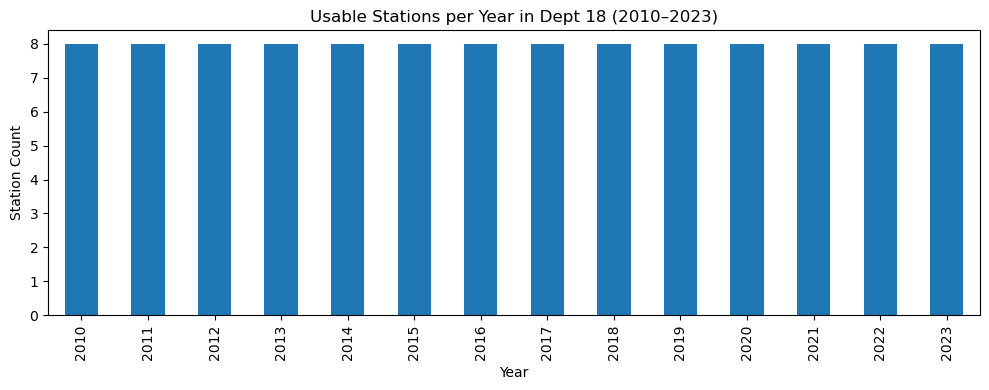

Usable stations in department 20 summary saved to 'usable_stations_summary_dept20_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


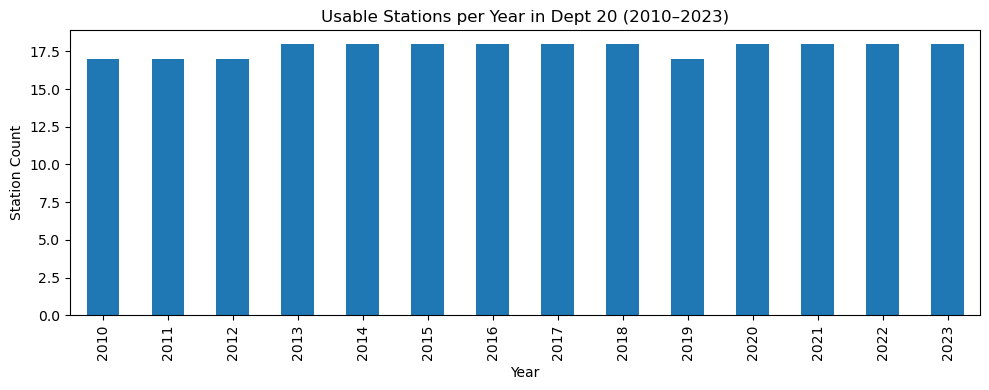

Usable stations in department 21 summary saved to 'usable_stations_summary_dept21_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


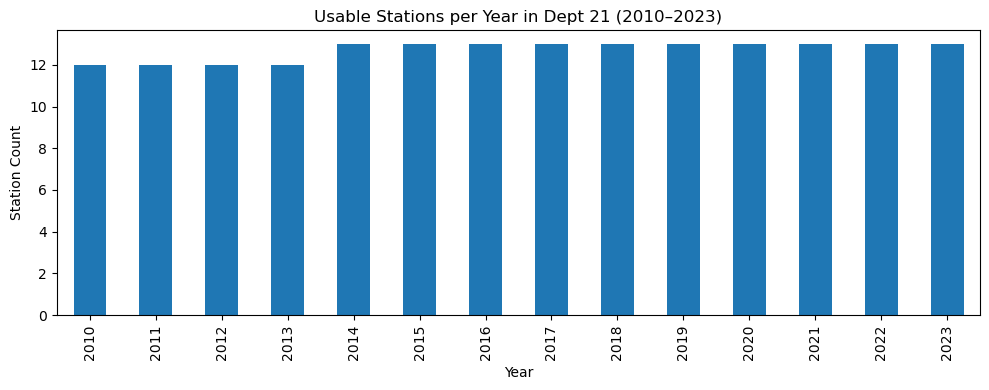

Usable stations in department 26 summary saved to 'usable_stations_summary_dept26_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


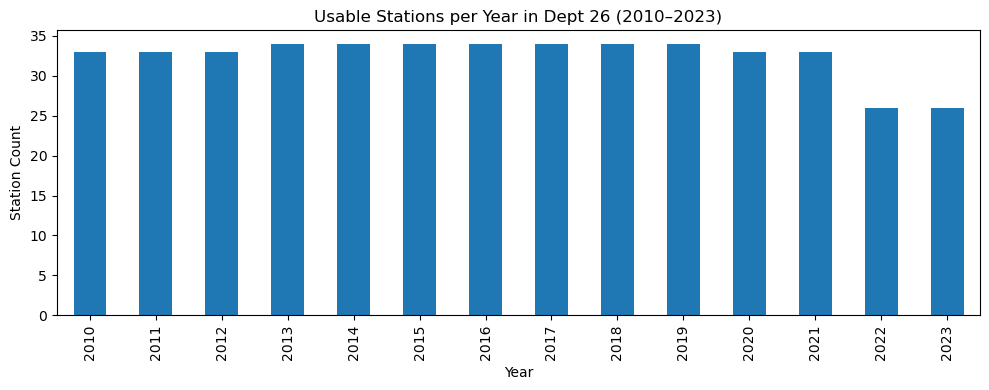

Usable stations in department 32 summary saved to 'usable_stations_summary_dept32_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


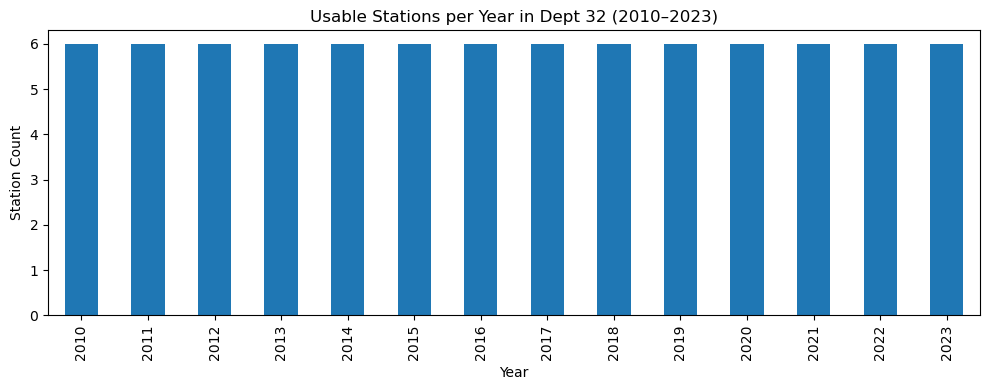

Usable stations in department 33 summary saved to 'usable_stations_summary_dept33_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


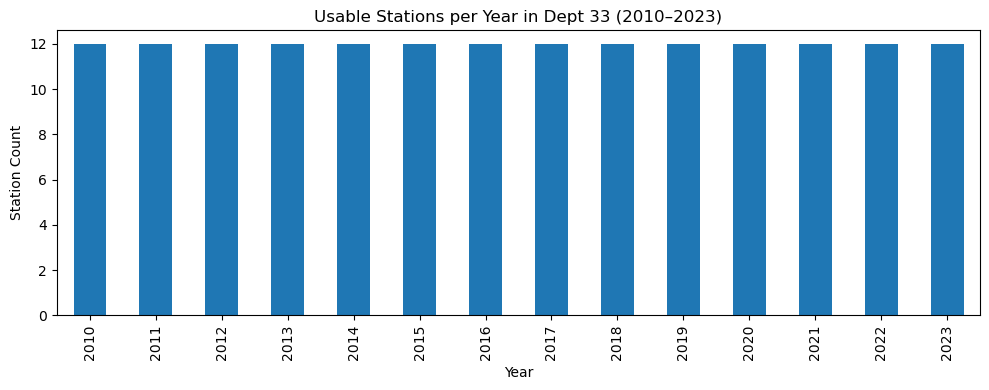

Usable stations in department 34 summary saved to 'usable_stations_summary_dept34_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


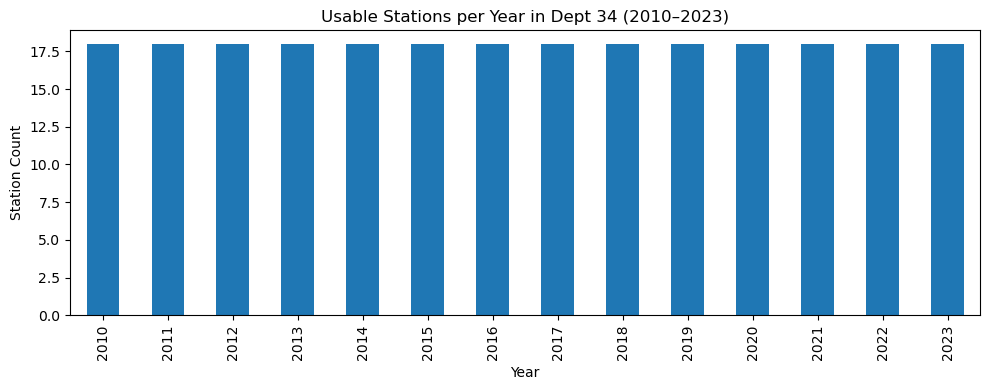

Usable stations in department 37 summary saved to 'usable_stations_summary_dept37_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


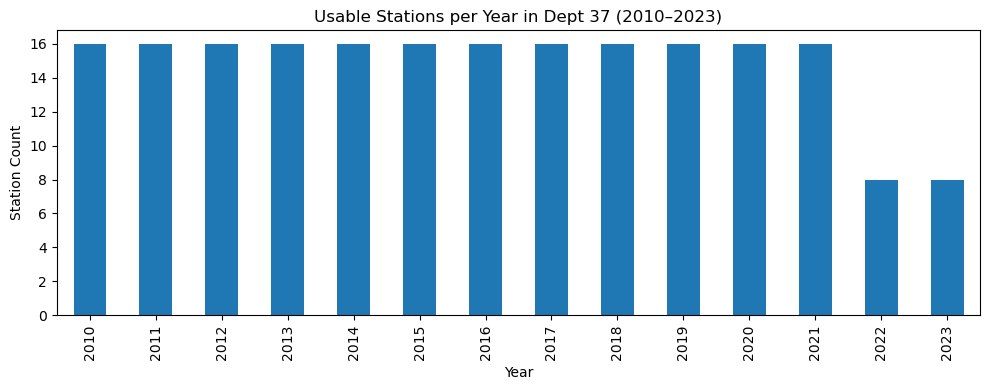

Usable stations in department 39 summary saved to 'usable_stations_summary_dept39_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


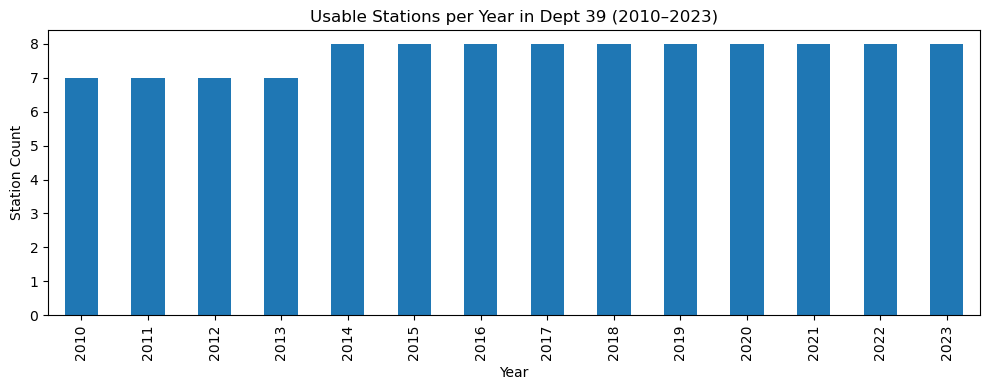

Usable stations in department 42 summary saved to 'usable_stations_summary_dept42_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


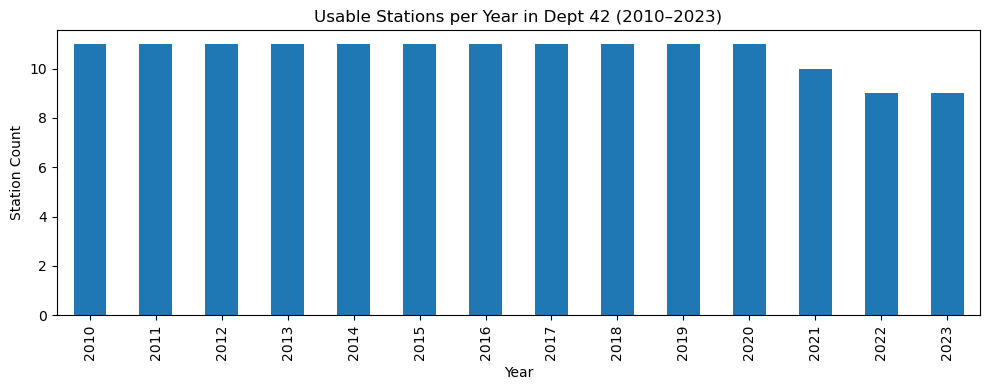

Usable stations in department 46 summary saved to 'usable_stations_summary_dept46_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


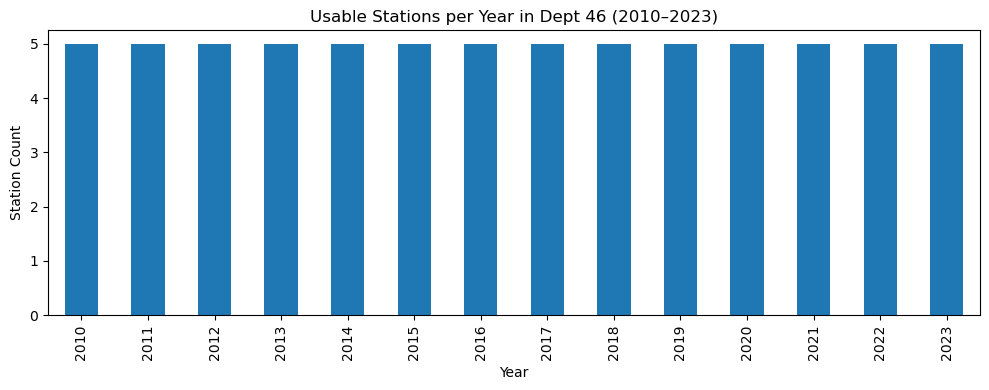

Usable stations in department 49 summary saved to 'usable_stations_summary_dept49_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


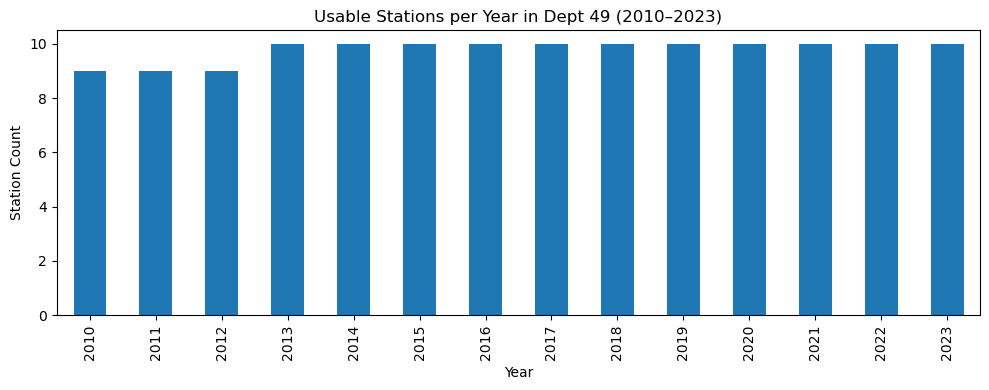

Usable stations in department 51 summary saved to 'usable_stations_summary_dept51_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


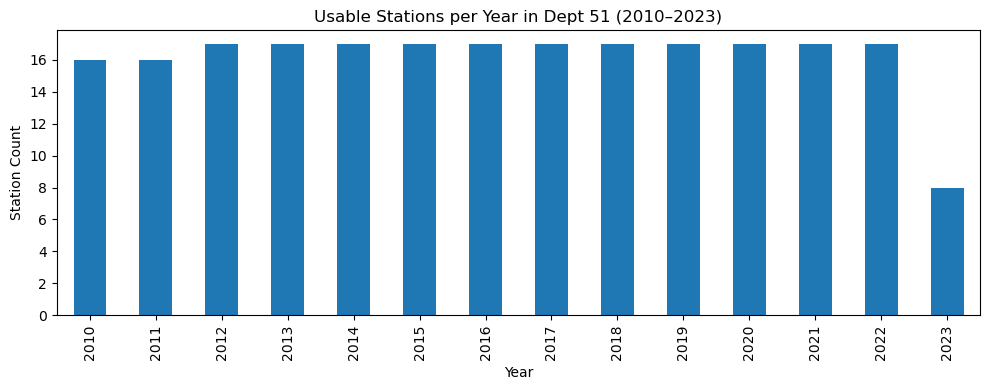

Usable stations in department 65 summary saved to 'usable_stations_summary_dept65_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


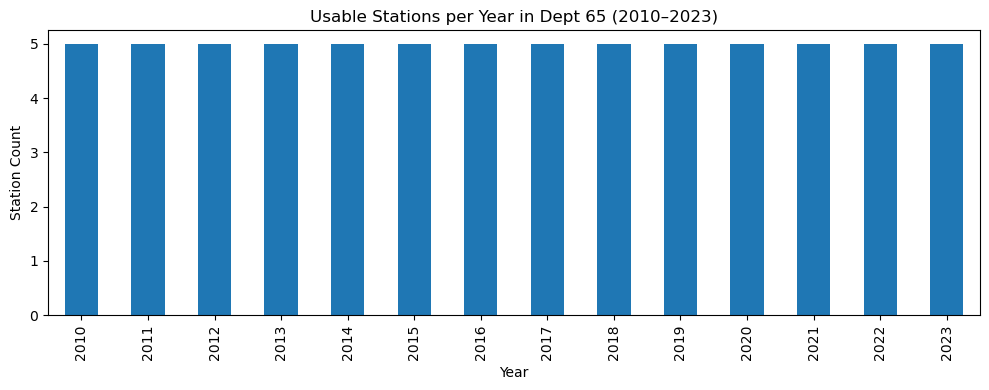

Usable stations in department 66 summary saved to 'usable_stations_summary_dept66_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


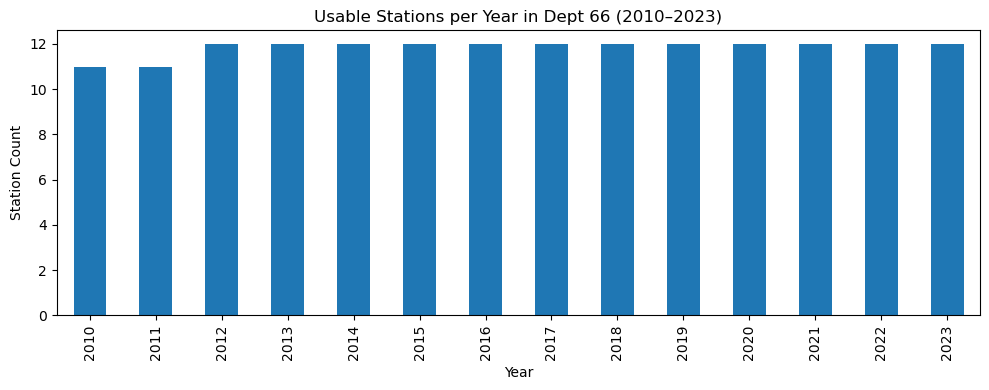

Usable stations in department 67 summary saved to 'usable_stations_summary_dept67_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


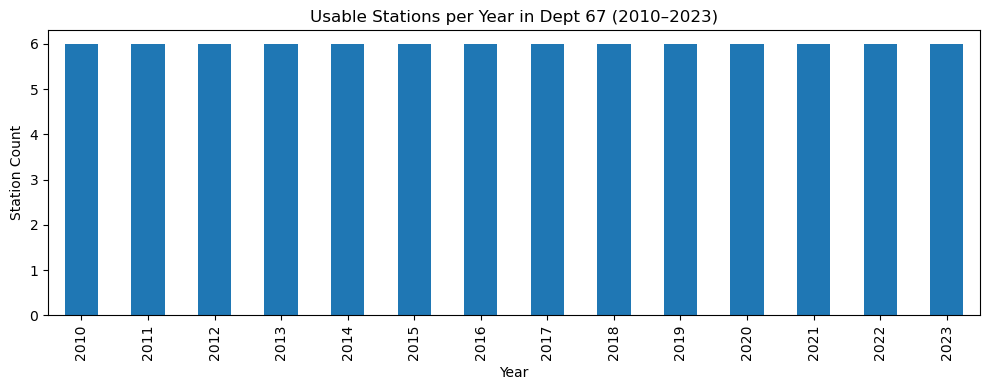

/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


Usable stations in department 68 summary saved to 'usable_stations_summary_dept68_thr1.csv'.


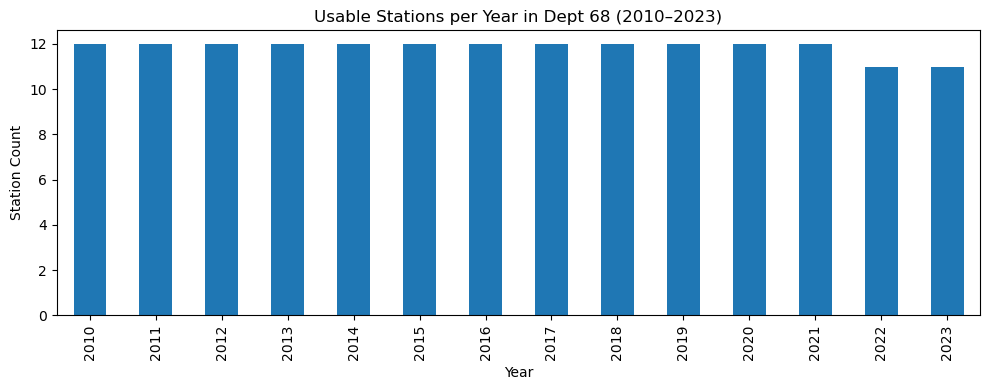

Usable stations in department 69 summary saved to 'usable_stations_summary_dept69_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


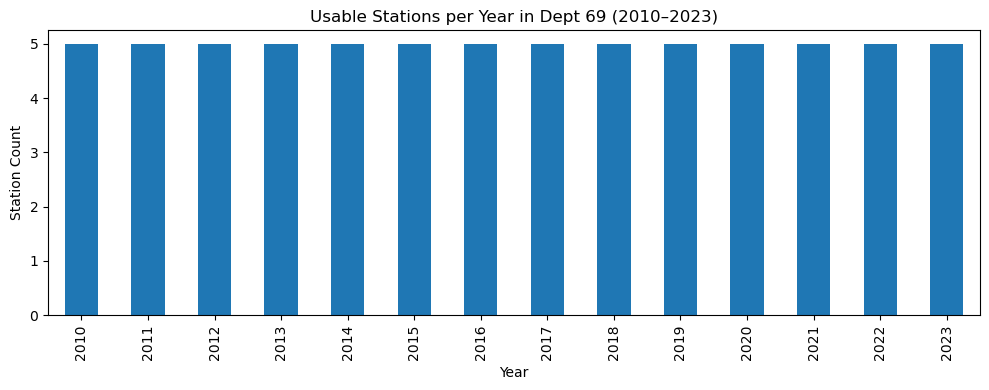

Usable stations in department 71 summary saved to 'usable_stations_summary_dept71_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


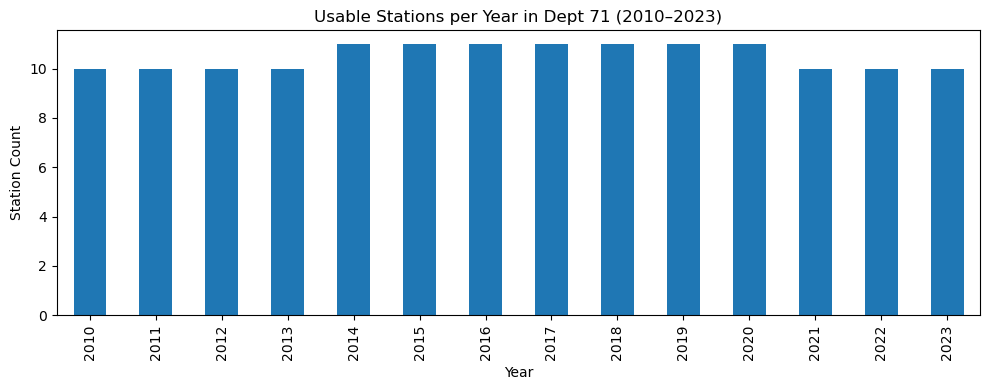

Usable stations in department 73 summary saved to 'usable_stations_summary_dept73_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


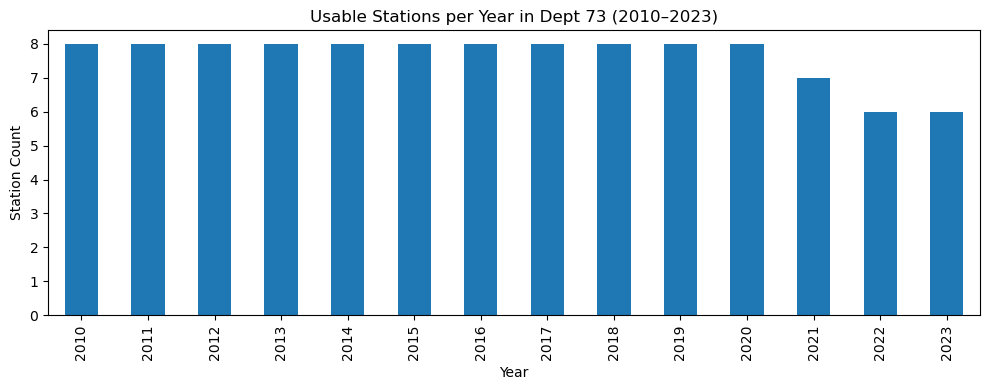

Usable stations in department 83 summary saved to 'usable_stations_summary_dept83_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


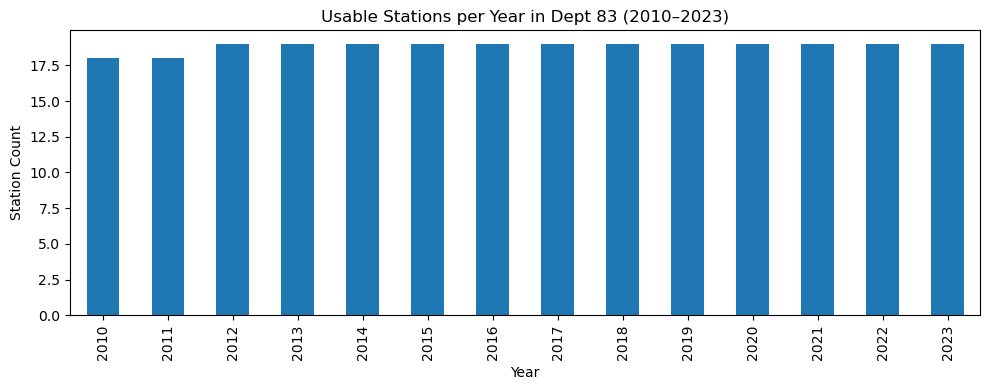

Usable stations in department 84 summary saved to 'usable_stations_summary_dept84_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


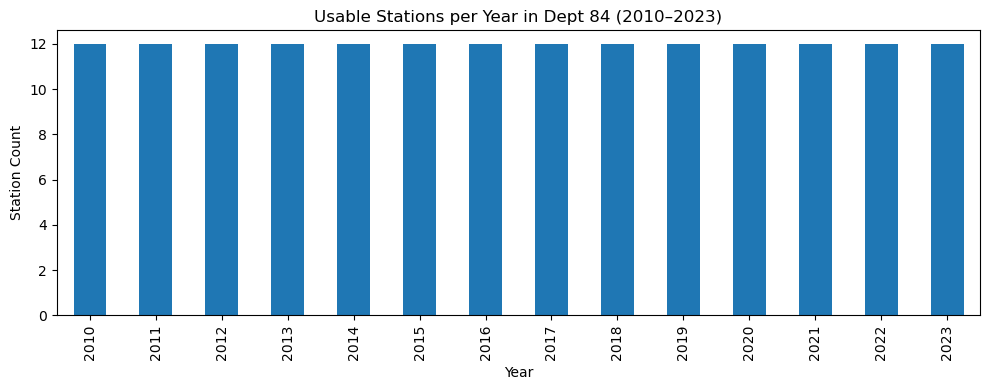

Usable stations in department 89 summary saved to 'usable_stations_summary_dept89_thr1.csv'.


/var/folders/pg/sp9kdgzs23z2bvfm7_sn7p640000gn/T/ipykernel_15519/4204609499.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = df.groupby("NUM_POSTE").apply(evaluate_station).reset_index()


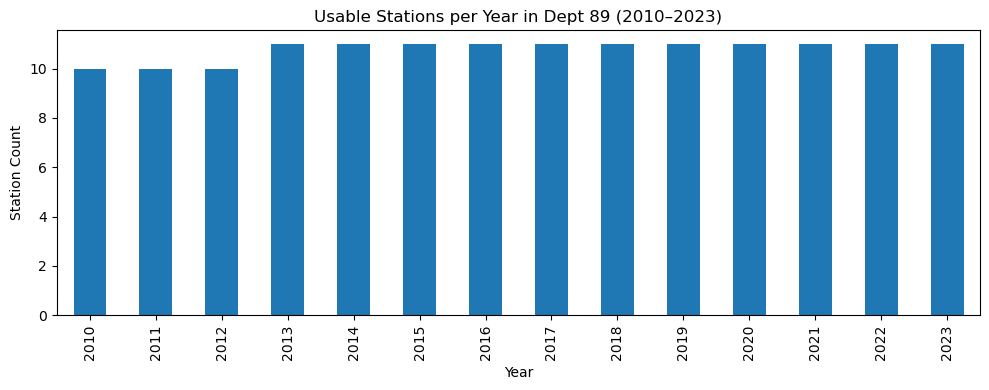

In [3]:
liste_departements = ["02","07","10","11","13","18","20","21","26","32","33","34","37","39","42","46","49","51","65","66","67","68","69","71","73","83","84","89"]

for dept in liste_departements:
    get_usable_stations_by_dept(
        department_number=dept,
        missing_threshold=0.01,
        year_start=2010,
        year_end=2023
    )

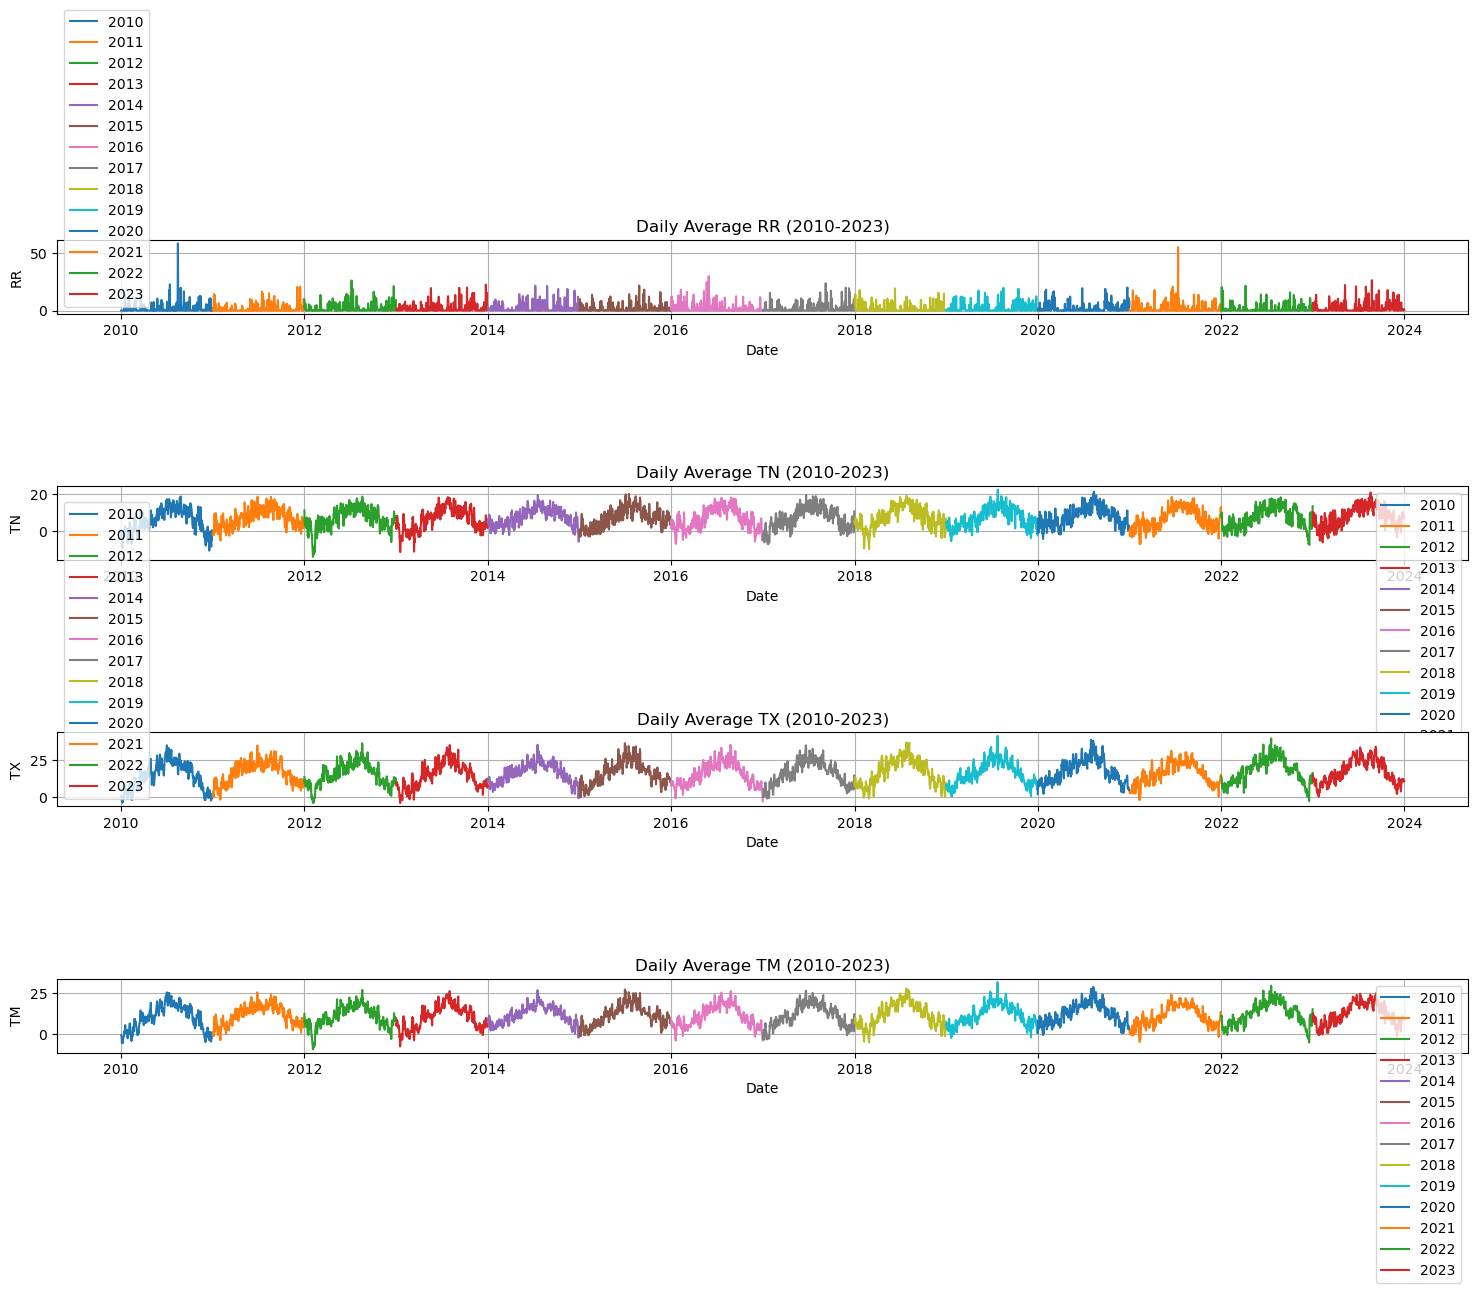

,Year,Month,Day,RR,TN,TX,TM,Date
0,2010,1,1,0.000000,-0.675000,-0.012500,-0.800000,2010-01-01
1,2010,1,2,0.025000,-3.937500,0.775000,-1.137500,2010-01-02
2,2010,1,3,0.050000,-3.600000,0.387500,-2.250000,2010-01-03
3,2010,1,4,0.000000,-8.637500,-3.087500,-5.500000,2010-01-04
4,2010,1,5,0.000000,-5.250000,-1.275000,-3.500000,2010-01-05
...,...,...,...,...,...,...,...,...
5108,2023,12,27,0.092308,6.676923,10.215385,8.838462,2023-12-27
5109,2023,12,28,0.015385,8.361538,11.438462,9.730769,2023-12-28
5110,2023,12,29,0.892308,8.500000,11.192308,9.723077,2023-12-29
5111,2023,12,30,1.346154,7.130769,10.584615,9.076923,2023-12-30


In [ ]:
def annual_weather_by_department(department_number, year_start=2010, year_end=2023):
    import pandas as pd
    import matplotlib.pyplot as plt

    # Load data
    df = pd.read_csv(f"/data/weather/Q_{department_number}_previous-1950-2023_RR-T-Vent.csv", sep=";", dtype=str)
    df["AAAAMMJJ"] = pd.to_datetime(df["AAAAMMJJ"], format="%Y%m%d", errors="coerce")
    df = df.dropna(subset=["AAAAMMJJ"])
    df = df[(df["AAAAMMJJ"].dt.year >= year_start) & (df["AAAAMMJJ"].dt.year <= year_end)]


    cols_to_check = ["RR", "TN", "TX", "TM"]
    df[cols_to_check] = df[cols_to_check].apply(pd.to_numeric, errors="coerce")
    df = df.dropna(subset=cols_to_check)
    df["Year"] = df["AAAAMMJJ"].dt.year
    df["Month"] = df["AAAAMMJJ"].dt.month
    df["Day"] = df["AAAAMMJJ"].dt.day

    # Group by day and calculate daily averages
    daily_avg = df.groupby(["Year", "Month", "Day"])[cols_to_check].mean().reset_index()
    daily_avg["Date"] = pd.to_datetime(daily_avg[["Year", "Month", "Day"]])

    # Plotting daily averages for each column and year
    plt.figure(figsize=(15, 10))
    for col in cols_to_check:
        plt.subplot(len(cols_to_check), 1, cols_to_check.index(col) + 1)
        for year in range(year_start, year_end + 1):
            yearly_data = daily_avg[daily_avg["Year"] == year]
            plt.plot(yearly_data["Date"], yearly_data[col], label=str(year))
        plt.title(f"Daily Average {col} ({year_start}-{year_end})")
        plt.xlabel("Date")
        plt.ylabel(col)
        plt.legend()
        plt.grid()
    plt.tight_layout()
    plt.show()
    return daily_avg

# Example usage:
annual_weather_by_department(department_number="02", year_start=2010, year_end=2023)


In [ ]:
import os
import pandas as pd
from tqdm import tqdm

# Folder where cleaned_parquet files are stored
parquet_folder = "/data/weather_pq/cleaned_parquet"  # update path
required_cols = ["RR", "TN", "TX", "TM"]

summary = []

# Loop through all department Parquet files
for file in tqdm(os.listdir(parquet_folder), desc="Checking daily coverage"):
    if file.endswith(".parquet"):
        dept = file.split("_")[1].split(".")[0]
        path = os.path.join(parquet_folder, file)

        try:
            df = pd.read_parquet(path)
            df["date"] = pd.to_datetime(df["AAAAMMJJ"]).dt.date
            df = df[df["AAAAMMJJ"].dt.year >= 2010]

            for col in required_cols:
                df[col] = pd.to_numeric(df[col], errors="coerce")

            daily_coverage = df.groupby("date")[required_cols].apply(
                lambda g: ((~g.isna()).all(axis=1)).any()
            ).rename("valid_day")

            total_days = daily_coverage.shape[0]
            valid_days = daily_coverage.sum()
            missing_days = total_days - valid_days
            percent_valid = round(100 * valid_days / total_days, 2)

            summary.append({
                "department": dept,
                "total_days": total_days,
                "valid_days": valid_days,
                "missing_days": missing_days,
                "percent_valid": percent_valid
            })

        except Exception as e:
            summary.append({
                "department": dept,
                "total_days": 0,
                "valid_days": 0,
                "missing_days": "error",
                "percent_valid": 0,
                "error": str(e)
            })

# Save results
coverage_df = pd.DataFrame(summary)
coverage_df = coverage_df.sort_values("department")
coverage_df.to_csv("daily_coverage_by_department.csv", index=False)
print("✅ Saved daily coverage summary to daily_coverage_by_department.csv")

# Display top few
coverage_df.head()


Checking daily coverage: 100%|██████████| 28/28 [00:10<00:00,  2.74it/s]

✅ Saved daily coverage summary to daily_coverage_by_department.csv


,department,total_days,valid_days,missing_days,percent_valid
6,02,5612,5612,0,100.0
20,07,5612,5612,0,100.0
4,10,5612,5612,0,100.0
2,11,5612,5612,0,100.0
13,13,5612,5612,0,100.0


In [ ]:
import os
import pandas as pd
from tqdm import tqdm

parquet_folder = "../../../data/weather_features/weather_features_02.parquet"

df = pd.read_parquet(parquet_folder)
df.head()

,dept,station,year,latitude,longitude,altitude,GDD,TM_summer,TX_summer,temp_amp_summer,hot_days,rainy_days_summer,rain_June,rain_SepOct,frost_days_Apr,avg_TM_Apr
0,02,02031001,2010,49.834000,4.200500,177,968.15,NaN,24.669355,12.709677,0,8,31.5,141.0,13,NaN
1,02,02031001,2011,49.834000,4.200500,177,1049.35,NaN,22.290323,11.532258,0,5,78.5,121.7,4,NaN
2,02,02037002,2010,49.595667,3.610333,78,1088.10,18.846774,24.970968,11.737097,1,7,50.8,101.8,2,10.000000
3,02,02037002,2011,49.595667,3.610333,78,1202.60,17.161290,22.862903,10.929032,0,4,86.7,78.1,0,13.143333
4,02,02037002,2012,49.595667,3.610333,78,1079.60,18.359677,24.574194,11.961290,2,5,98.8,108.6,5,8.443333


In [ ]:
import pandas as pd
from pathlib import Path



# Dossier contenant les fichiers météo départementaux
weather_folder = Path("../../../data/weather_features")
output_folder = Path("../../../data/weather_by_year")
output_folder.mkdir(exist_ok=True, parents=True)

# Liste de tous les départements sous forme de strings avec zéro devant si besoin
departements = ["02","07","10","11","13","18","20","21","26","32","33","34","37","39","42","46","49","51","65","66","67","68","69","71","73","83","84","89"]

# Liste pour collecter tous les fichiers
all_data = []

for dept in departements:
    file_path = weather_folder / f"weather_features_{dept}.parquet"
    if file_path.exists():
        df = pd.read_parquet(file_path)
        all_data.append(df)
    else:
        print(f"Fichier manquant : {file_path}")

# Fusionner tous les départements
full_df = pd.concat(all_data, ignore_index=True)

# Créer un fichier par année
for year in full_df["year"].unique():
    year_df = full_df[full_df["year"] == year]
    year_df.to_parquet(output_folder / f"weather_all_stations_{year}.parquet", index=False)
    print(f"Fichier pour {year} écrit avec {len(year_df)} lignes.")


Fichier pour 2010 écrit avec 1467 lignes.
Fichier pour 2011 écrit avec 1447 lignes.
Fichier pour 2012 écrit avec 1430 lignes.
Fichier pour 2013 écrit avec 1405 lignes.
Fichier pour 2014 écrit avec 1386 lignes.
Fichier pour 2015 écrit avec 1343 lignes.
Fichier pour 2016 écrit avec 1316 lignes.
Fichier pour 2017 écrit avec 1261 lignes.
Fichier pour 2018 écrit avec 1208 lignes.
Fichier pour 2019 écrit avec 1147 lignes.
Fichier pour 2020 écrit avec 1102 lignes.
Fichier pour 2021 écrit avec 894 lignes.
Fichier pour 2022 écrit avec 769 lignes.
Fichier pour 2023 écrit avec 730 lignes.
Fichier pour 2024 écrit avec 716 lignes.
Fichier pour 2025 écrit avec 712 lignes.


In [ ]:
import pandas as pd
from pathlib import Path

input_folder = Path("../../../data/weather_by_year")
output_folder = Path("../../../data/weather_by_year_cleaned")
output_folder.mkdir(parents=True, exist_ok=True)

VALID_RANGES = {
    "GDD": (0, 3000),
    "TM_summer": (10, 35),
    "TX_summer": (15, 45),
    "temp_amp_summer": (5, 30),
    "hot_days": (0, 92),
    "rainy_days_summer": (0, 92),
    "rain_June": (0, 400),
    "rain_SepOct": (0, 400),
    "frost_days_Apr": (0, 30),
    "avg_TM_Apr": (-5, 25),
}

for file in input_folder.glob("weather_all_stations_*.parquet"):
    df = pd.read_parquet(file)
    
    df = df.dropna(subset=VALID_RANGES.keys())

    for var, (min_val, max_val) in VALID_RANGES.items():
        df = df[(df[var] >= min_val) & (df[var] <= max_val)]

    year = file.stem.split("_")[-1]
    df.to_parquet(output_folder / f"weather_cleaned_{year}.parquet", index=False)
    print(f"{year} : {len(df)} stations retenues après nettoyage.")


2012 : 491 stations retenues après nettoyage.
2024 : 587 stations retenues après nettoyage.
2025 : 0 stations retenues après nettoyage.
2013 : 497 stations retenues après nettoyage.
2018 : 478 stations retenues après nettoyage.
2011 : 503 stations retenues après nettoyage.
2010 : 484 stations retenues après nettoyage.
2019 : 529 stations retenues après nettoyage.
2023 : 622 stations retenues après nettoyage.
2015 : 469 stations retenues après nettoyage.
2014 : 476 stations retenues après nettoyage.
2022 : 615 stations retenues après nettoyage.
2016 : 488 stations retenues après nettoyage.
2020 : 571 stations retenues après nettoyage.
2021 : 579 stations retenues après nettoyage.
2017 : 485 stations retenues après nettoyage.


In [ ]:
import pandas as pd
from pathlib import Path
from geopy.distance import geodesic
from tqdm import tqdm

domains_path = Path("../../../data/domaines.csv")  
weather_folder = Path("../../../data/weather_by_year_cleaned")
output_folder = Path("../../../data/domain_weather_matched")
output_folder.mkdir(parents=True, exist_ok=True)


domains_df = pd.read_csv(domains_path)

all_matches = []

unmatched_counter = 0

for weather_file in sorted(weather_folder.glob("weather_cleaned_*.parquet")):
    year = int(weather_file.stem.split("_")[-1])
    weather_df = pd.read_parquet(weather_file)

    stations = weather_df[["station", "latitude", "longitude"]].drop_duplicates()

    for idx, domain in domains_df.iterrows():
        d_latlon = (domain["latitude"], domain["longitude"])

        stations["distance_km"] = stations.apply(
            lambda row: geodesic(d_latlon, (row["latitude"], row["longitude"])).km,
            axis=1
        )

        nearby = stations[stations["distance_km"] <= 30]

        if nearby.empty:
            unmatched_counter += 1
            continue

        closest_station = nearby.sort_values("distance_km").iloc[0]["station"]


        meteo_row = weather_df[(weather_df["station"] == closest_station)]

        meteo_row = meteo_row.iloc[0].to_dict()

        record = {
            "year": year,
            "domain_id": domain["domain_id"],
            "domain_latitude": domain["latitude"],
            "domain_longitude": domain["longitude"],
            "station_id": closest_station,
            "distance_km": nearby.sort_values("distance_km").iloc[0]["distance_km"]
        }

        record.update({k: v for k, v in meteo_row.items() if k not in ["station", "latitude", "longitude", "year"]})

        all_matches.append(record)

final_df = pd.DataFrame(all_matches)
final_df.to_parquet(output_folder / "domain_weather_matched.parquet", index=False)
final_df.to_csv(output_folder / "domain_weather_matched.csv", index=False)

print(f"\nAssociation terminée. Total non associés : {unmatched_counter}")
